<a href="https://colab.research.google.com/github/Jlok17/2022MSDS/blob/main/Test12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data 622 Homework 3

Perform an analysis of the dataset(s) used in Homework #2 using the SVM algorithm. Compare the results with the results from previous homework.

#### Pre-work
Read the following articles:

*   https://www.hindawi.com/journals/complexity/2021/5550344/
*   https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8137961/


Search for academic content (at least 3 articles) that compare the use of decision trees vs SVMs in your current area of expertise. Perform an analysis of the dataset used in Homework #2 using the SVM algorithm. Compare the results with the results from previous homework.



#### Questions:

1. Which algorithm is recommended to get more accurate results?
2. Is it better for classification or regression scenarios?
3. Do you agree with the recommendations?
4. Why?


#### Deliverable:

1. Essay (minimum 500 word document) Write a short essay explaining your selection of algorithms and how they relate to the data and what you are trying to do

2. Exploratory Analysis using R or Python (submit code + errors + analysis as notebook or copy/paste to document). Include analysis R (or Python) code.


### Comparing the Use of Decision Trees vs SVMs:



#### Articles

*   https://www.e3s-conferences.org/articles/e3sconf/abs/2023/36/e3sconf_iconnect2023_09004/e3sconf_iconnect2023_09004.html
*   https://jurnal.yoctobrain.org/index.php/ijodas/article/view/76
* https://www.sciencedirect.com/science/article/pii/S1550742423001227



### Data Source

For this dataset, we are taking the one of the data sources about wine quality. It is related to the Portuguese "Vinho Verde" wine with 2 data sources, one for red and the other for white. These wines are from the north of Portugal and using this data I will be attempting to model wine quality based on their input variables that was measured by physicochemical tests. The data itself is hosted on the UC Irvine Machine Learning Repository and comprises of 4898 entries across 12 different variables, 11 inputs and 1 output. Utilizing this data set, I will be exploring the use of decision trees and random forest to see "the bad and ugly" aspects of decision trees.


The 12 columns being:
Input Variables based on Physicochemical Test
* Fixed Acidity
* Volatile Acidity
* Citric Acid
* Residual Sugar
* Chlorides
* Free Sulfur Dioxide
* Total Sulfur Dioxide
* Density
* pH
* Sulphates
* Alcohol

Output Variables
* Quality (score between 0 and 10)




[Data Source](https://archive.ics.uci.edu/dataset/186/wine+quality)

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight

### Exploratory Analysis

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Jlok17/2022MSDS/main/Source/winequality-white.csv", sep =";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
df['quality_group'] = df['quality'].apply(lambda x: 0 if x in [3, 4, 5] else (1 if x == 6 else 2))

In [12]:
# Split Data to Train/Test
X = df.drop(columns=['quality_group','quality'])
y = df['quality_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features to scaled unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Computing Class Weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# SVM classifier with class weights
svm_classifier = SVC(kernel='linear', C=1.0, class_weight=class_weights_dict, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Prediction
y_pred = svm_classifier.predict(X_test_scaled)

# Classifer Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print(classification_report(y_test, y_pred))

Accuracy: 0.5306122448979592
              precision    recall  f1-score   support

           0       0.57      0.70      0.63       321
           1       0.56      0.31      0.40       432
           2       0.47      0.71      0.56       227

    accuracy                           0.53       980
   macro avg       0.53      0.57      0.53       980
weighted avg       0.54      0.53      0.51       980



In [6]:
# Parameter Grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'kernel': ['rbf']
}

# GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best Parameter and Grid
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Prediction
y_pred2 = grid_search.predict(X_test_scaled)
print("Test set accuracy: {:.2f}".format(accuracy_score(y_test, y_pred2)))
print(classification_report(y_test, y_pred2))

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   1.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   1.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   1.1s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   1.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   1.1s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   1.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.5s
[CV] END .........................C=0.1, gamma=1

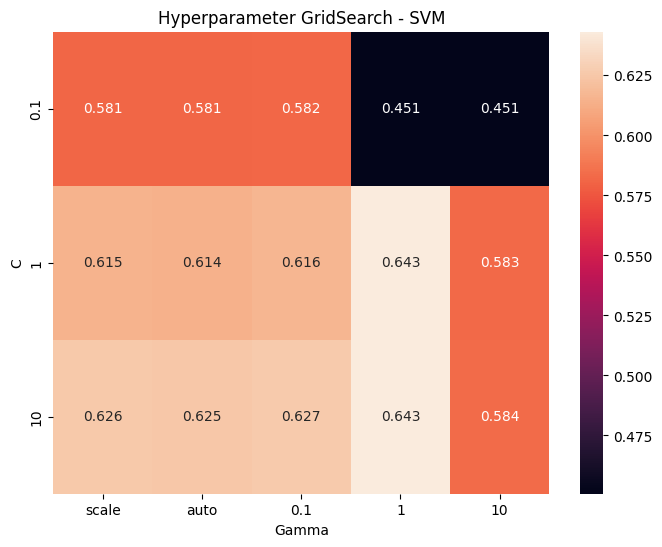

In [11]:
# GridSearchCV Results
scores = grid_search.cv_results_['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']))

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(scores, annot=True, fmt=".3f", xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])
plt.title('Hyperparameter GridSearch - SVM')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

### Essay


Search for academic content (at least 3 articles) that compare the use of decision trees vs SVMs in your current area of expertise. Perform an analysis of the dataset used in Homework #2 using the SVM algorithm. Compare the results with the results from previous homework.



#### Questions:

1. Which algorithm is recommended to get more accurate results?
2. Is it better for classification or regression scenarios?
3. Do you agree with the recommendations?
4. Why?


#### Deliverable:

1. Essay (minimum 500 word document) Write a short essay explaining your selection of algorithms and how they relate to the data and what you are trying to do

2. Exploratory Analysis using R or Python (submit code + errors + analysis as notebook or copy/paste to document). Include analysis R (or Python) code.



 Decision Tree 1

              precision    recall  f1-score   support

           0       0.51      0.52      0.51       334
           1       0.47      0.57      0.52       415
           2       0.57      0.34      0.43       231

    accuracy                           0.50       980
   macro avg       0.52      0.48      0.49       980
weighted avg       0.51      0.50      0.49       980

[[174 153   7]
 [127 236  52]
 [ 43 109  79]]

Decision Tree 2
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       318
           1       0.54      0.60      0.57       447
           2       0.54      0.38      0.44       215

    accuracy                           0.56       980
   macro avg       0.56      0.53      0.54       980
weighted avg       0.56      0.56      0.55       980

[[196 114   8]
 [116 269  62]
 [ 16 118  81]]
